In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft,ifft,fftshift,ifftshift
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
sample_rate,audio_data=wavfile.read("F:/4th year/8th Sem/EE599- Audio Engineering and Aocutics/Pitch_Detection/Audio_Files/C_major_psr.wav")
audio_data=audio_data.T
print(audio_data.shape)

(316416,)


In [3]:
n_per_bar=25000
d=n_per_bar*8+50000
ns=np.arange(d).reshape(8,-1)
x=audio_data[50000:d].reshape(8,-1)
y=audio_data[50000:d].reshape(8,-1)
#h=np.hamming(n_per_bar)
#x=x*h

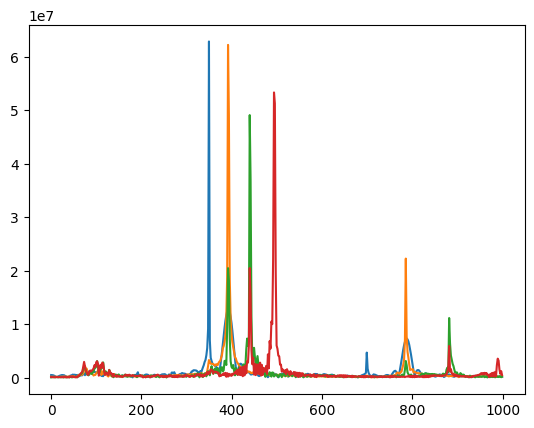

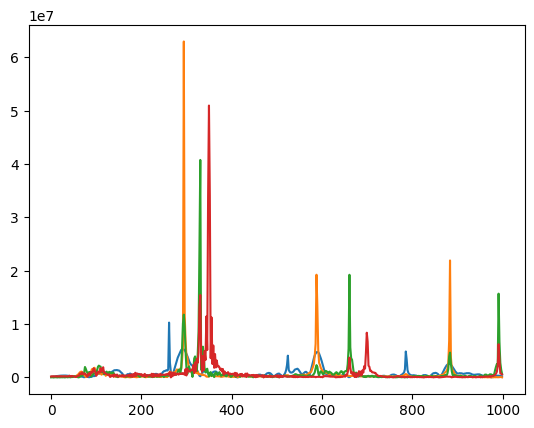

In [6]:
f=np.linspace(-sample_rate/2,sample_rate/2,n_per_bar,endpoint=False)
##spectrum
X=fftshift(fft(x))
Y=fftshift(fft(y))

ii=np.where((f>=0)&(f<1000))
for k in range(4):
  plt.plot(f[ii],np.abs(X[k][ii]))
plt.show()

for k in range(4,8):
  plt.plot(f[ii],np.abs(X[k][ii]))
plt.show()


In [7]:
#HPS- Harmonic prodoct spectrum
max_harmonic=4
ii=np.where(f>=0)     #positive frequencies
f_pos=f[ii]
X_pos=np.squeeze(np.abs(X[:,ii]))
X_HPS=np.copy(X_pos)
for harmonic in range(2,max_harmonic+1):
  X_temp=X_pos[:,::harmonic]
  l=X_temp.shape[1]
  X_HPS[:,0:l]*=X_temp


In [8]:
ii=np.argmax(X_HPS,axis=1)
print(f_pos[ii])

[393.6  393.6  441.6  495.36 293.76 293.76 330.24 349.44]


Text(0, 0.5, 'Estimated Pitch(Hz)')

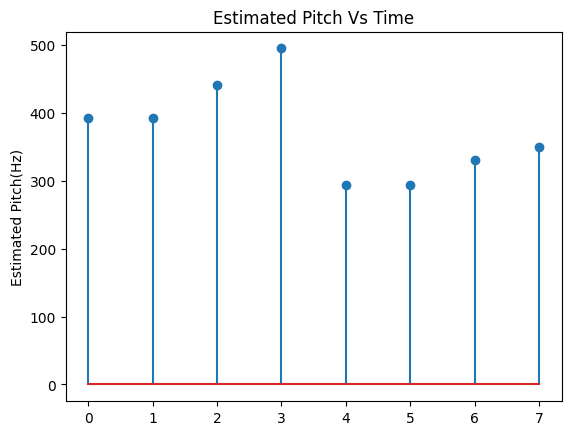

In [10]:
plt.stem(f_pos[ii])
plt.title('Estimated Pitch Vs Time')
plt.ylabel('Estimated Pitch(Hz)')